<a href="https://colab.research.google.com/github/MysterionNY/Kurs259_Machine_Learning/blob/main/demos/05_supervisedml_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


![img](https://github.com/LuWidme/uk259/blob/main/img/1_N1-K-A43_98pYZ27fnupDA%20(1).jpg?raw=1)

# Supervised Machine Learning, Part 1

## Linear Regression

In linear regression, the aim is to predict a continuous varibale (meaning a numerical value, as opposed to a class) using a set of input variables. To train our model, we need to provide a **labeled dataset**. This labeled dataset contains explanatory variables (the variables used to predict the value) as well as the dependent variables (the true value). The algorihm tries to find a line, that best matches the true values.

### 1. Import the Dataset


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


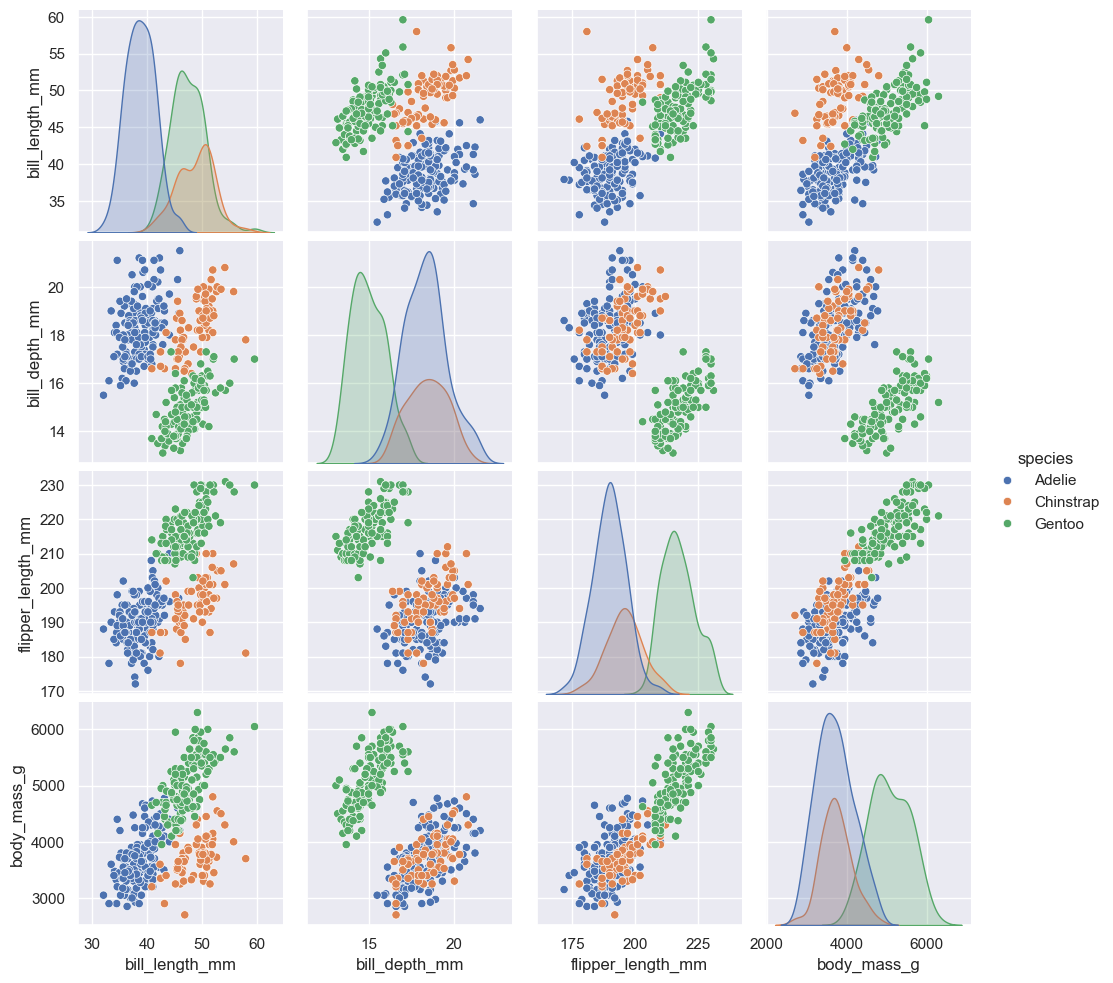

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Load the penguins dataset

penguins = sns.load_dataset("penguins")
print(penguins.head())
sns.pairplot(data=penguins, hue="species")
penguins.describe()




### Task 1

Try to fit a linear regression to the data. Show the correlation between the variables `bill_length_mm` and `bill_depth_mm` (`bill_depth_mm` is the dependent variable). You can use the function `sns.lmplot` to achieve this.

Do you see anything interesting? Are there other aspects of the data you would like to investigate? (Hint: The result changes when you split the data into the different groups)


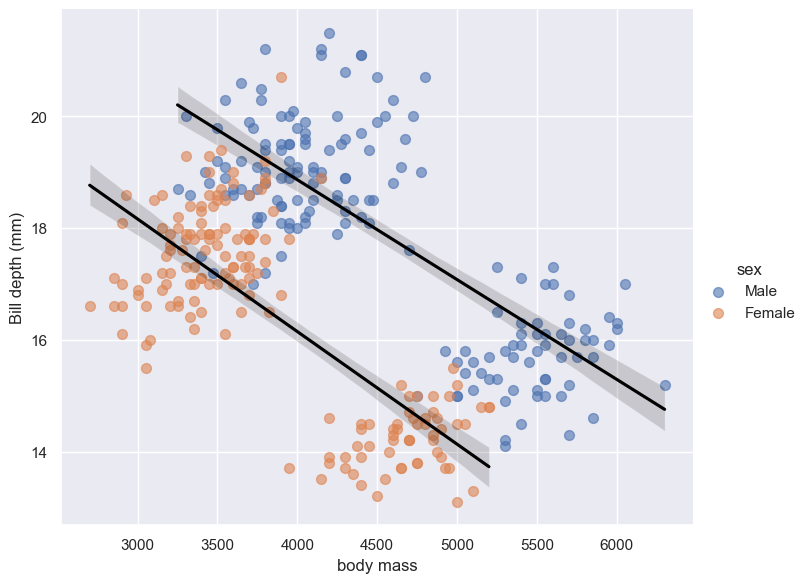

In [43]:
# Plot relation of snoot lenght and depth. use sns lmplot to automatticaly fit a linear regression on the data
g = sns.lmplot(
    data=penguins,
    x="body_mass_g",
    y="bill_depth_mm",
    hue="sex",
    height=6,
    aspect=1.2,
    scatter_kws={"s": 50, "alpha": 0.6},
    line_kws={"color": "black"},
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("body mass", "Bill depth (mm)")





 ## 4. Perform Regression with statsmodels

For Regression with more than one input variable, We can use the OLS module. we'll use a dataset of restaurant guests and try to predtict the size of the tip depending on different factors

[Explanation of Results](https://www.geeksforgeeks.org/machine-learning/interpreting-the-results-of-linear-regression-using-ols-summary/)

especially the Variables R and the coefficiants of the individual variables are important to interpret your model.

In [31]:
from statsmodels.formula.api import ols

data = sns.load_dataset("penguins")
formula = 'body_mass_g~bill_depth_mm+bill_length_mm+species+sex'

#Fit model using Ordinary least squares method
result =ols(formula=formula, data=data[["species", "bill_depth_mm", "bill_length_mm", "sex", "body_mass_g"]]).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     413.5
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          5.42e-139
Time:                        09:29:30   Log-Likelihood:                -2368.7
No. Observations:                 333   AIC:                             4749.
Df Residuals:                     327   BIC:                             4772.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              843.9812    403.596      2.091      0.037      50.010    1637.953
species[T.Chinstrap]  -245.1516     84.595     -2.898      0.004    -411.571     -78.732
species[T.Gentoo]     1443.3525    107.784     13.391      0.000    1231.314    1655.391
sex[T.Male]            437.2007     49.110      8.903      0.000     340.590     533.812
bill_depth_mm           87.9328     20.219      4.349      0.000      48.157     127.709
bill_length_mm          26.5366      7.244      3.663      0.000      12.287      40.787
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.095
Skew:                           0.027   Prob(JB):                        0.953
Kurtosis:                       2.938   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It’d create 3 tables and we are mostly interested in the 2nd table which contains the coefficients, p-values, etc.

From the summary table, we can say that the intercept (const) coefficient is 6.97
 and the independent variable coefficient is 0.055 (signifies if independent variable increases by 1 units, the dependent variable increases by 0.055 units)

If the p-value (Prob) of the independent variable/s is greater than 0.050, we say that the variable is not significant and we may drop the variable.
And finally, the R-squared, R² is nothing but the goodness of the fit of the model. In other words, how well our model fitted the observation. R² ranges between 0 and 1. There is no clear universal range for the best R² but, it depends on a case-to-case basis.

Adjusted R² on the other hand, is a modified version of R-squared that has been adjusted for the number of predictors (inputs) in the model. The adjusted R-squared increases when the new independent term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected.



5. Plot the Regression Line
To plot the regression line on the graph, simply define the linear regression equation, i.e., y_hat = b0 + (b1*x1)

b0 = coefficient of the bias variable

b1 = coefficient of the input/s variables

and finally, plot the regression line using matplotlib.pyplot() as shown below:

Intercept     0.920270
total_bill    0.105025
dtype: float64


C:\Users\mert2\AppData\Local\Temp\ipykernel_27020\1167023980.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m=result.params[1]
C:\Users\mert2\AppData\Local\Temp\ipykernel_27020\1167023980.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c=result.params[0]


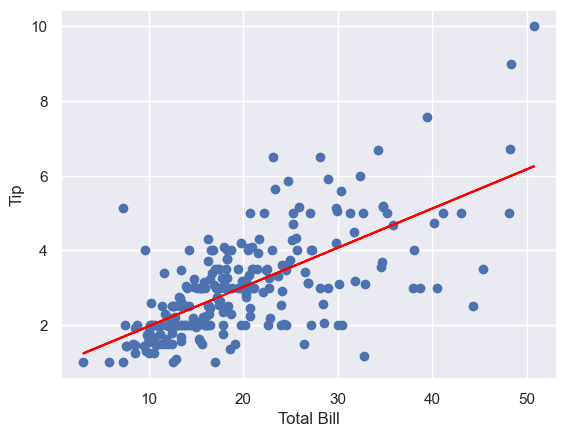

In [13]:
formula = 'tip~total_bill'


#Fit model using Ordinary least squares method
result =ols(formula=formula, data=data[["tip","total_bill"]]).fit()
result.summary()

print(result.params)
m=result.params[1]
x1=data['total_bill']
y=data['tip']

c=result.params[0]
yhat=m*x1+c

plt.scatter(x1,y)
plt.xlabel ("Total Bill")
plt.ylabel ("Tip")
fig=plt.plot(x1,yhat, c="red")
plt.show()